electric field unit: 3028963164057.2695
magnetic field unit: 10103.533572072949
density unit nc: 9.922162833181312e+26


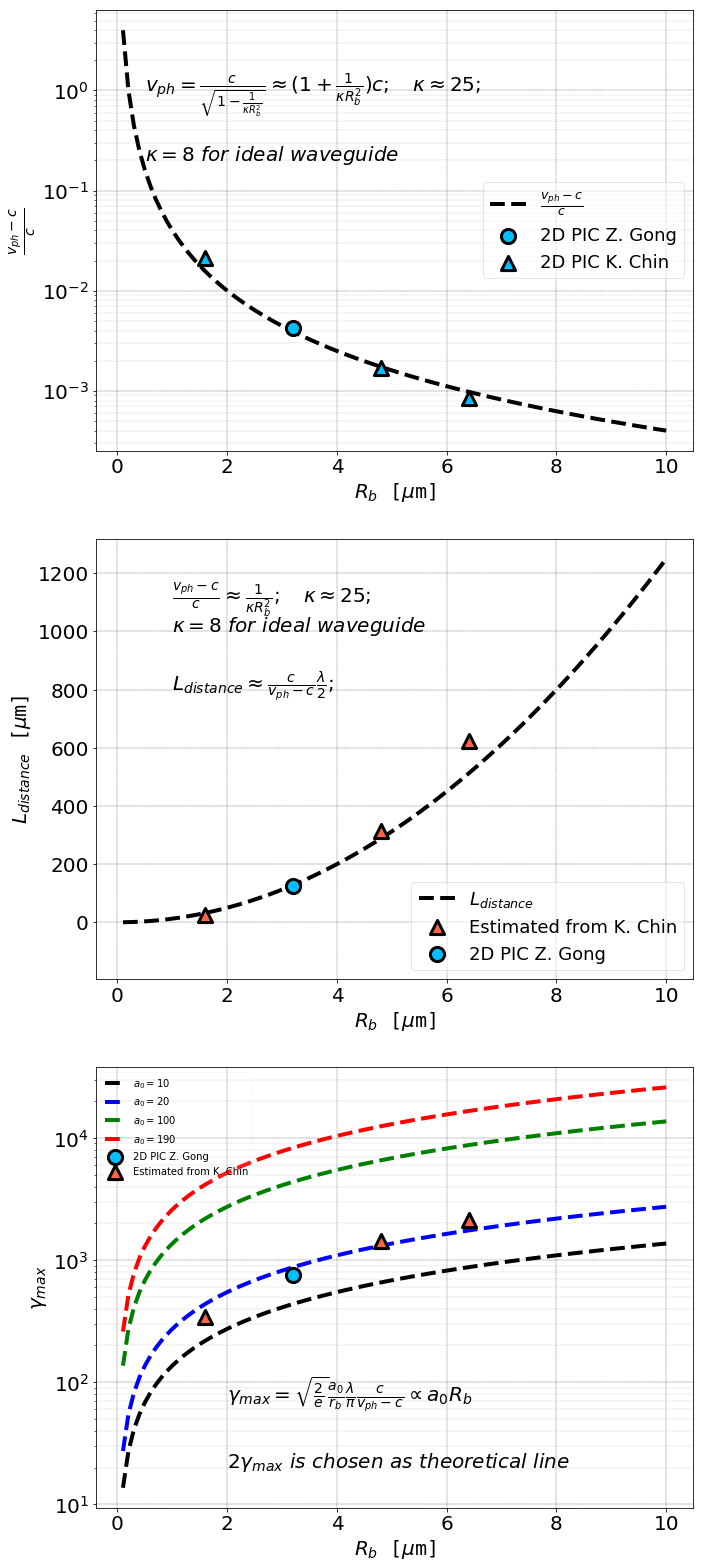

In [79]:
#import sdf
import matplotlib
#matplotlib.use('agg')
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal


######## Constant defined here ########
pi        =     3.1415926535897932384626
q0        =     1.602176565e-19 # C
m0        =     9.10938291e-31  # kg
v0        =     2.99792458e8    # m/s^2
kb        =     1.3806488e-23   # J/K
mu0       =     4.0e-7*np.pi       # N/A^2
epsilon0  =     8.8541878176203899e-12 # F/m
h_planck  =     6.62606957e-34  # J s
wavelength=     1.06e-6
frequency =     v0*2*pi/wavelength

exunit    =     m0*v0*frequency/q0
bxunit    =     m0*frequency/q0
denunit    =     frequency**2*epsilon0*m0/q0**2
jalf      =     4*np.pi*epsilon0*m0*v0**3/q0/wavelength**2
print('electric field unit: '+str(exunit))
print('magnetic field unit: '+str(bxunit))
print('density unit nc: '+str(denunit))

font = {'family' : 'monospace',  
      'color'  : 'black',  
      'weight' : 'normal',  
      'size'   : 20,  
      }  

font_size = 20

##below is for norm colorbar
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y)) 
    ##end for norm colorbar####



to_path='./'

rb = np.linspace(0.1,10,100)    # channel radius 
a0 = np.linspace(1,200,200)  # laser amplitude
a0, rb = np.meshgrid(a0, rb) # transfor the parameter to 2d

v_ph = 1.+1./(25*(rb/1.0)**2)
dE   = (2/np.e)**0.5*a0/(rb*2*pi)*2/pi*0.5/(v_ph-1)*2*pi*2 

plt.subplot(3,1,3)
sim_rb1 = np.array([3.2])
sim_gg1 = np.array([750.])
sim_rb  = np.array([1.6, 4.8, 6.4])
sim_gg = np.array([25, 312.5, 625 ])*(2/np.e)**0.5*20/(sim_rb*2*pi)*2/pi*2*pi*2 
plt.plot(rb[:,9],dE[:,9],'--k',linewidth=4, label='$a_0 = 10$',zorder=0)
plt.plot(rb[:,19],dE[:,19],'--b',linewidth=4, label='$a_0 = 20$',zorder=1)
plt.plot(rb[:,99],dE[:,99],'--g',linewidth=4, label='$a_0 = 100$',zorder=2)
plt.plot(rb[:,189],dE[:,189],'--r',linewidth=4, label='$a_0 = 190$',zorder=3)
#plt.plot(power,lower,'--g',linewidth=4, label='With depletion',zorder=1)
plt.scatter(sim_rb1,sim_gg1,c='deepskyblue',marker='o',s=200, label='2D PIC Z. Gong', edgecolors='black', linewidth='3',alpha=1,zorder=4)
plt.scatter(sim_rb,sim_gg,c='tomato',marker='^',s=200, label='Estimated from K. Chin', edgecolors='black', linewidth='3',alpha=1,zorder=4)
#plt.scatter(power_p,result_p,c='tomato',marker='^',s=200, label='3D PIC (peak energy)', edgecolors='black',linewidth='3',alpha=1,zorder=3)
#### manifesting colorbar, changing label and axis properties ####
plt.xlabel('$R_b$ [$\mu$m]',fontdict=font)
plt.ylabel('$\gamma_{max}$',fontdict=font)
plt.xticks(fontsize=font_size); plt.yticks(fontsize=font_size);
plt.grid(which='major',color='k', linestyle='--', linewidth=0.3)
plt.grid(which='minor',color='k', linestyle='--', linewidth=0.1)
#plt.xlim(0,5) 
#plt.ylim(0,1.25) 
plt.yscale('log')
plt.legend(loc='upper left',fontsize=10,framealpha=0.1)
plt.text(2,70,r'$\gamma_{max}=\sqrt{\frac{2}{e}}\frac{a_0}{r_b}\frac{\lambda}{\pi}\frac{c}{v_{ph}-c}\propto a_0R_b$',fontdict=font)
plt.text(2,20,r'$2\gamma_{max}\ is\ chosen\ as\ theoretical\ line$',fontdict=font)


plt.subplot(3,1,1)
sim_rb  = np.array([1.6, 4.8, 6.4])
sim_dvph = np.array([2.1e-2, 1.7e-3, 0.84e-3])
sim_rb1  = np.array([3.2])
sim_dvph1 = np.array([4.2e-3])
plt.plot(rb[:,19],v_ph[:,19]-1,'--k',linewidth=4, label=r'$\frac{v_{ph}-c}{c}$',zorder=0)
plt.scatter(sim_rb1,sim_dvph1,c='deepskyblue',marker='o',s=200, label='2D PIC Z. Gong', edgecolors='black', linewidth='3',alpha=1,zorder=4)
plt.scatter(sim_rb,sim_dvph,c='deepskyblue',marker='^',s=200, label='2D PIC K. Chin', edgecolors='black', linewidth='3',alpha=1,zorder=4)
#plt.scatter(power_p,result_p,c='tomato',marker='^',s=200, label='3D PIC (peak energy)', edgecolors='black',linewidth='3',alpha=1,zorder=3)
#### manifesting colorbar, changing label and axis properties ####
plt.xlabel('$R_b$ [$\mu$m]',fontdict=font)
plt.ylabel(r'$\frac{v_{ph}-c}{c}$',fontdict=font)
plt.xticks(fontsize=font_size); plt.yticks(fontsize=font_size);
plt.grid(which='major',color='k', linestyle='--', linewidth=0.3)
plt.grid(which='minor',color='k', linestyle='--', linewidth=0.1)
#plt.xlim(1.2,6.8) 
#plt.ylim(0,1.25) 
plt.yscale('log')
plt.legend(loc='center right',fontsize=18,framealpha=0.5)
plt.text(0.5,1,r'$v_{ph}=\frac{c}{\sqrt{1-\frac{1}{\kappa R_b^2}}}\approx(1+\frac{1}{\kappa R_b^2})c;\ \ \ \kappa\approx25;$',fontdict=font)
plt.text(0.5,0.2,r'$\kappa=8\ for\ ideal\ waveguide$',fontdict=font)


length_max = 0.5/(v_ph-1)

plt.subplot(3,1,2)
sim_rb = np.array([1.6, 4.8, 6.4])
sim_len = np.array([25, 312.5, 625 ])
sim_rb1 = np.array([3.2])
sim_len1 = np.array([125])
#plt.plot(rb[:,9],length_max[:,9],'--k',linewidth=4, label='$a_0 = 10$',zorder=0)
#plt.plot(rb[:,19],length_max[:,19],'--b',linewidth=4, label='$a_0 = 20$',zorder=1)
#plt.plot(rb[:,99],length_max[:,99],'--g',linewidth=4, label='$a_0 = 100$',zorder=2)
plt.plot(rb[:,189],length_max[:,189],'--k',linewidth=4, label='$L_{distance}$',zorder=0)
plt.scatter(sim_rb,sim_len,c='tomato',marker='^',s=200, label='Estimated from K. Chin', edgecolors='black', linewidth='3',alpha=1,zorder=1)
plt.scatter(sim_rb1,sim_len1,c='deepskyblue',marker='o',s=200, label='2D PIC Z. Gong', edgecolors='black', linewidth='3',alpha=1,zorder=1)
#plt.plot(power,lower,'--g',linewidth=4, label='With depletion',zorder=1)
#plt.scatter(power_c,result_c,c='deepskyblue',marker='o',s=200, label='3D PIC (cut-off energy)', edgecolors='black', linewidth='3',alpha=1,zorder=2)
#plt.scatter(power_p,result_p,c='tomato',marker='^',s=200, label='3D PIC (peak energy)', edgecolors='black',linewidth='3',alpha=1,zorder=3)
#### manifesting colorbar, changing label and axis properties ####
plt.xlabel('$R_b$ [$\mu$m]',fontdict=font)
plt.ylabel('$L_{distance}$ [$\mu$m]',fontdict=font)
plt.xticks(fontsize=font_size); plt.yticks(fontsize=font_size);
plt.grid(which='major',color='k', linestyle='--', linewidth=0.3)
plt.grid(which='minor',color='k', linestyle='--', linewidth=0.1)
#plt.xlim(0,5) 
#plt.ylim(0,1.25) 
#plt.yscale('log')
plt.legend(loc='lower right',fontsize=18,framealpha=0.5)
plt.text(1,1100,r'$\frac{v_{ph}-c}{c}\approx\frac{1}{\kappa R_b^2};\ \ \ \kappa\approx25;$',fontdict=font)
plt.text(1,1000,r'$\kappa=8\ for\ ideal\ waveguide$',fontdict=font)
plt.text(1,800, r'$L_{distance}\approx\frac{c}{v_{ph}-c}\frac{\lambda}{2};$',fontdict=font)

plt.subplots_adjust(left=0.16, bottom=0.15, right=0.99, top=0.95,
        wspace=None, hspace=None)
#        plt.text(250,6e9,'t='+str(round(time/1.0e-15,0))+' fs',fontdict=font)
fig = plt.gcf()
fig.set_size_inches(10, 26)
fig.savefig('./theory_for_conductor.png',format='png',dpi=160)
#plt.close("all")


In [10]:
rb = np.linspace(1,10,10)
a0 = np.linspace(1,200,200)

a0, rb = np.meshgrid(a0, rb)
print(a0.shape)
print(rb.shape)
rb = np.linspace(0.1,10,100)    # channel radius 
a0 = np.linspace(1,200,200)  # laser amplitude
a0, rb = np.meshgrid(a0, rb) # transfor the parameter to 2d
a0[31,:]
rb[31,:]

(10, 200)
(10, 200)


array([ 3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,
        3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,
        3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,
        3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,
        3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,
        3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,
        3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,
        3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,
        3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,
        3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,
        3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,
        3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,
        3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,
        3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3

In [7]:
np.e

2.718281828459045

In [44]:
import numpy as np
import time

start_time = time.time()
elapsed_time = time.time() - start_time

nums = [1,2,3,4,4,4,4,4,4,4,4,4,7, 11, 15]
target = 26
class Solution:
    def twoSum(nums, target):
        """
        :type nums: List[int]
        :type target: int
        :rtype: List[int]
        """
        #temp = np.zeros(nums.size)
        for i in range(np.size(nums)):
            temp_n = i+1
            for j in range(np.size(nums)-temp_n):
                if (nums[i] + nums[j+temp_n] == target):
                    return [i,j+temp_n]

print(Solution.twoSum(nums,target))


elapsed_time = time.time() - start_time

print('Time consuming:',elapsed_time/1e-6,'ms')

[13, 14]
Time consuming: 548.1243133544922 ms


In [42]:
import numpy as np
import time

start_time = time.time()
elapsed_time = time.time() - start_time

nums = [1,2,3,4,4,4,4,4,4,4,4,4,7, 11, 15]
target = 26
class Solution:
    def twoSum(nums, target):
        for i in range(np.size(nums)):
            if target-nums[i] in nums and nums.index(target-nums[i]) != i:
                    return [i,nums.index(target-nums[i])]

print(Solution.twoSum(nums,target))


elapsed_time = time.time() - start_time

print('Time consuming:',elapsed_time/1e-6,'ms')

[13, 14]
Time consuming: 576.019287109375 ms


In [41]:
len(nums)

15

In [26]:
np.size(nums)

4

In [93]:
class Solution:
    def addTwoNumbers(l1, l2):
        """
        :type l1: ListNode
        :type l2: ListNode
        :rtype: ListNode
        """
        l3 = None
        a = 0
        while l1 or l2 or a:
            if l1:
                a+=l1.val
                l1=l1.next
                
            if l2:
                a+=l2.val
                l2=l2.next
                
            if l3:
                l3.next = ListNode(a%10)
                l3 = l3.next
            else:
                l0 = ListNode(a%10)
                l3 = l0
            a = a//10
                
        return l0
    

In [46]:
class Node:
    def __init__(self,val):
        self.val = val
        self.next = None # the pointer initially points to nothing
        
        

node1 = Node(12) 
node2 = Node(99) 
node3 = Node(37) 
node1.next = node2 # 12->99
node2.next = node3 # 99->37
# the entire linked list now looks like: 12->99->37

In [54]:
tt = node1

In [80]:
if tt.next.next:
    print('c')

c


In [148]:
import numpy as np
s='aasfegwer'

def find_max(s):
    data=np.zeros(len(s))

    result=''
    temp = ''

    for i in range(len(s)):
        if (len(s[i:]) < len(temp)):
            break
        result=''
        j = i
        print(s[i])
        while j <= len(s)-1:
            if s[j] not in result:
                result = result + s[j]
            else:
                break
            print('in',s[i:j])
            j+=1
        if( len(temp)<len(result) ): 
            temp=result

    return(temp)

In [153]:
a=[1,2,3,4,5]
a.append(5)
a

[1, 2, 3, 4, 5, 5]

In [116]:
a=range(1,2,5)

In [129]:
's'+'b'

'sb'

In [134]:
if len('asdf')>len('a')

SyntaxError: invalid syntax (<ipython-input-134-becabb067599>, line 1)

In [ ]:
class Solution:
    def findMedianSortedArrays(nums1, nums2):
        """
        :type nums1: List[int]
        :type nums2: List[int]
        :rtype: float
        